In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from lazypredict.Supervised import LazyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
parent_dir = "Kp and ap since 1932, daily updated.txt"
num_of_lines_to_skip = 29

In [34]:
geomagnetic_activity_dataset = pd.read_csv(parent_dir, skiprows =num_of_lines_to_skip,sep = r' +',engine = 'python')

In [35]:
geomagnetic_activity_dataset.head()

,#YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,1932,1,1,0.00,1.50,0.00,0.06,3.33,18,1
1,1932,1,1,3.00,4.50,0.12,0.19,2.67,12,1
2,1932,1,1,6.00,7.50,0.25,0.31,2.33,9,1
3,1932,1,1,9.00,10.50,0.38,0.44,2.67,12,1
4,1932,1,1,12.00,13.50,0.50,0.56,3.33,18,1


In [36]:
geomagnetic_activity_dataset.shape

(268112, 10)

In [37]:
np.sum(geomagnetic_activity_dataset.duplicated())

0

In [38]:
np.sum(geomagnetic_activity_dataset.isna())

#YYY      0
MM        0
DD        0
hh.h      0
hh._m     0
days      0
days_m    0
Kp        0
ap        0
D         0
dtype: int64

In [39]:
geomagnetic_activity_dataset['D'].unique()

array([1, 2, 0], dtype=int64)

In [40]:
def get_feature_importnace():
    for column in geomagnetic_activity_dataset.columns:
        if column != 'ap':
            correlation,pvalue = stats.pearsonr(geomagnetic_activity_dataset[column],geomagnetic_activity_dataset['Kp'])
            print('Between {feature} and ap there is a correlation equal {corr} and p value equal {pval}'.format(feature=column, corr= correlation, pval=pvalue))

In [41]:
get_feature_importnace()

Between #YYY and ap there is a correlation equal -0.1135228115716241 and p value equal 0.0
Between MM and ap there is a correlation equal -0.029268150235159236 and p value equal 6.699153420388024e-52
Between DD and ap there is a correlation equal 0.0020155363287888434 and p value equal 0.29665591989069284
Between hh.h and ap there is a correlation equal -0.0025489983854783344 and p value equal 0.18688328692691314
Between hh._m and ap there is a correlation equal -0.0025489983854783344 and p value equal 0.18688328692691314
Between days and ap there is a correlation equal -0.11384080497169685 and p value equal 0.0
Between days_m and ap there is a correlation equal -0.11384080497169685 and p value equal 0.0
Between Kp and ap there is a correlation equal 1.0 and p value equal 0.0
Between D and ap there is a correlation equal -0.0662752859535709 and p value equal 1.2004586585083433e-258


In [42]:
geomagnetic_activity_dataset['Kp'].max()

9.0

In [43]:
geomagnetic_activity_dataset['Kp'].min()

0.0

In [44]:
geomagnetic_activity_dataset.drop(columns=['ap'],axis=1,inplace=True)

In [45]:
geomagnetic_activity_dataset.head(10)

,#YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,D
0,1932,1,1,0.00,1.50,0.00,0.06,3.33,1
1,1932,1,1,3.00,4.50,0.12,0.19,2.67,1
2,1932,1,1,6.00,7.50,0.25,0.31,2.33,1
3,1932,1,1,9.00,10.50,0.38,0.44,2.67,1
4,1932,1,1,12.00,13.50,0.50,0.56,3.33,1
5,1932,1,1,15.00,16.50,0.62,0.69,2.67,1
6,1932,1,1,18.00,19.50,0.75,0.81,3.33,1
7,1932,1,1,21.00,22.50,0.88,0.94,3.33,1
8,1932,1,2,0.00,1.50,1.00,1.06,3.67,1
9,1932,1,2,3.00,4.50,1.12,1.19,3.67,1


In [46]:
268112 * 0.8

214489.6

In [47]:
y_train = geomagnetic_activity_dataset['Kp'][:214489]
y_test = geomagnetic_activity_dataset['Kp'][214489:]
geomagnetic_activity_dataset.drop(columns= ['Kp'],axis=1,inplace = True)
x_train = geomagnetic_activity_dataset[:214489]
x_test = geomagnetic_activity_dataset[214489:]

In [48]:
regressor = DecisionTreeRegressor()


In [49]:
regressor.fit(x_train,y_train)
predictions = regressor.predict(x_test)
for i,p in enumerate(predictions):
    if p < 0:
        predictions[i] = 0
    elif p > 9 :
        predictions[i] = 9
print(f'r2_score: {r2_score(y_test,predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,predictions))}')
print(f'MAE: {mean_absolute_error(y_test,predictions)}')

r2_score: -0.7943562139530529
MSE: 2.7669766141767522
RMSE: 1.663423161488607
MAE: 1.2406632601682115


In [54]:
predictions.mean()

0.5857127538556216

In [55]:
y_test

214489   2.00
214490   1.33
214491   1.67
214492   1.67
214493   3.67
         ... 
268107   1.00
268108   2.00
268109   2.00
268110   2.00
268111   2.00
Name: Kp, Length: 53623, dtype: float64

In [56]:
y_test.max()

8.667

<AxesSubplot:>

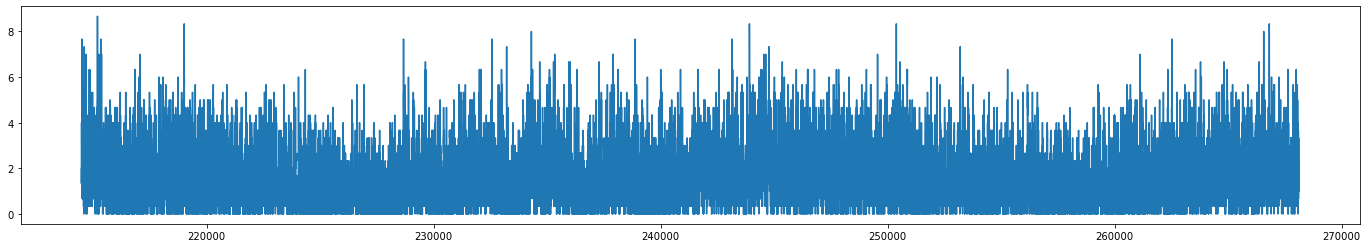

In [58]:
y_test.plot(figsize=(24,4))

In [ ]:
from lazypredict.Supervised import LazyRegressor
regressor = LazyRegressor(verbose = 1)
models, predictions = regressor.fit(x_train,x_test,y_train,y_test)
print(models)